In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [2]:
LABEL_NAMES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
    ]

def input_img_2_segmentation(img_path):
    
    # 모덷 경로
    model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
    model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

    #세그멘테이션 모델을 생성
    model = semantic_segmentation()
    model.load_pascalvoc_model(model_file)

    # 모델에 이미지를 입력
    segvalues, output = model.segmentAsPascalvoc(img_path) # PASCAL VOC 데이터로 학습된 모델을 이용
    
    # 물체
    segvalues_name = []
    for class_id in segvalues['class_ids']:
        segvalues_name.append(LABEL_NAMES[class_id])
    
    return segvalues, segvalues_name, output

# colormap
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

def get_seg_map(colormap_idx):
    color = colormap[colormap_idx]
    color[0], color[2] = color[2], color[0]

    seg_map = np.all(output==color, axis=-1)
    return seg_map

def add_blur_bg_img(seg_map, bg_orig, blur_rate=(10,10)):

    # 배경 흐리게
    bg_orig_blur = cv2.blur(img_orig, blur_rate)
    plt.imshow(cv2.cvtColor(bg_orig_blur, cv2.COLOR_BGR2RGB))

    # 마스크
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color) 
    plt.imshow(cv2.cvtColor(img_bg_mask, cv2.COLOR_BGR2RGB))

    # 흐린배경+마스크 합치기
    img_bg_blur = cv2.bitwise_and(bg_orig_blur, img_bg_mask)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))

    plt.show()
    
    # 원본과 합성
    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

    return img_concat

(426, 640, 3)


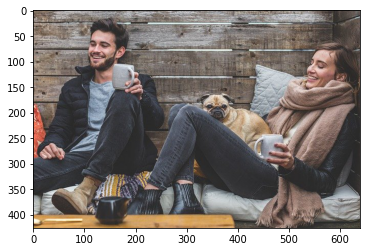

In [3]:
img_path_p = os.getenv("HOME")+'/aiffel/workspace/ex7/people.png' 

img_orig = cv2.imread(img_path_p) 
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

{'class_ids': array([ 0, 12, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
['background', 'dog', 'person']


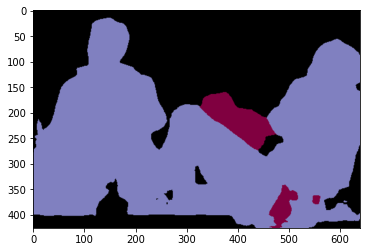

In [4]:
segvalues, segvalues_name, output = input_img_2_segmentation(img_path_p)

print(segvalues)
print(segvalues_name)
plt.imshow(output)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(426, 640)


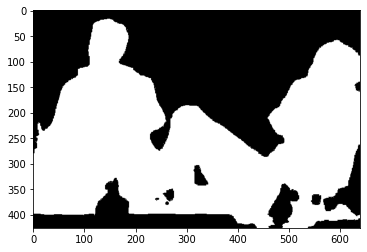

In [5]:
seg_map_p = get_seg_map(15) # 사람 15
print(seg_map_p)

print(seg_map_p.shape)
plt.imshow(seg_map_p, cmap='gray')
plt.show()

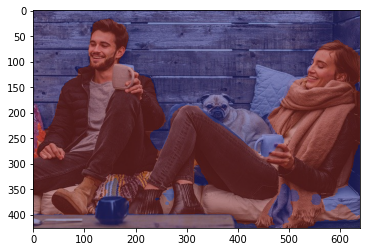

In [6]:
# 원래 이미지와 합쳐서 세그멘테이션 확인
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 변경
img_mask = seg_map_p.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본과 마스크 합치기
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

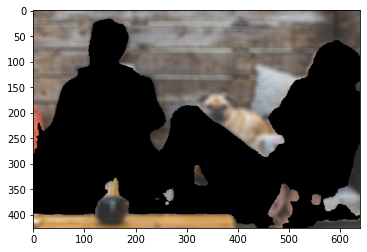

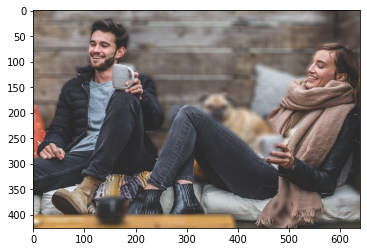

In [7]:
# 합성
img_concat = add_blur_bg_img(seg_map_p, img_orig, (10,10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(427, 640, 3)


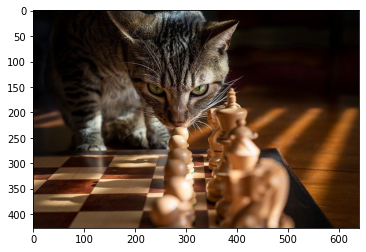

In [8]:
# 고양이
img_path_tc = os.getenv("HOME")+"/aiffel/workspace/ex7/tabby-cat.png"

img_orig = cv2.imread(img_path_tc) 
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

{'class_ids': array([0, 8]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
['background', 'cat']


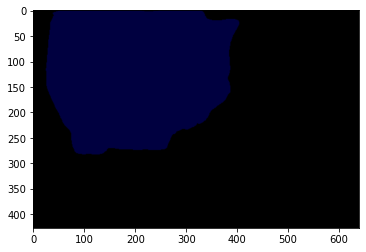

In [9]:
segvalues, segvalues_name, output = input_img_2_segmentation(img_path_tc)

print(segvalues)
print(segvalues_name)
plt.imshow(output)
# cat의 index : 8

(427, 640)


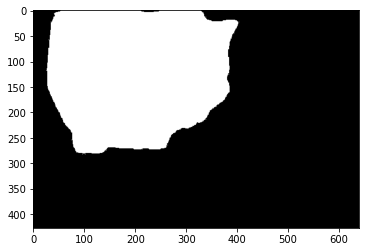

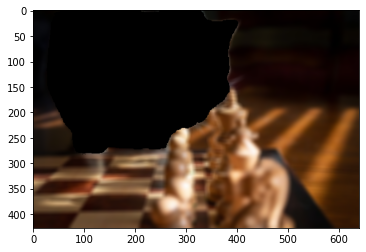

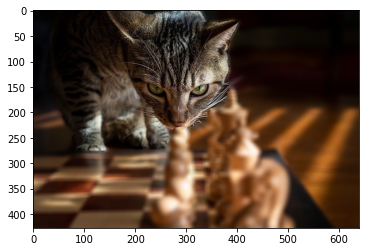

In [276]:
seg_map_tc = get_seg_map(8) 
print(seg_map_tc.shape)
plt.imshow(seg_map_tc, cmap='gray')
plt.show()

img_concat_tc = add_blur_bg_img(seg_map_tc, img_orig, (10,10))
plt.imshow(cv2.cvtColor(img_concat_tc, cv2.COLOR_BGR2RGB))
plt.show()


(360, 541, 3)


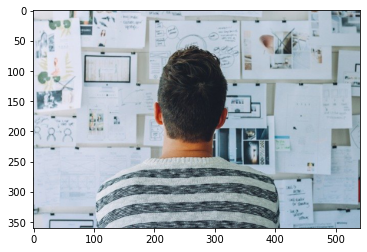

(360, 640, 3)


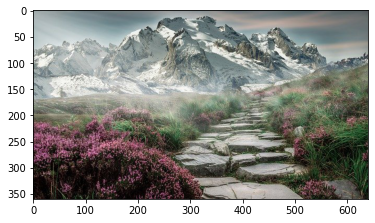

In [85]:
# 크로마키 사진(인물+배경 합성)
img_path_m = os.getenv("HOME")+"/aiffel/workspace/ex7/man.png"
img_path_bg = os.getenv("HOME")+"/aiffel/workspace/ex7/mountain-landscape.png"

img_orig_m = cv2.imread(img_path_m) 
print(img_orig_m.shape)
plt.imshow(cv2.cvtColor(img_orig_m, cv2.COLOR_BGR2RGB))
plt.show()

img_orig_bg = cv2.imread(img_path_bg) 
print(img_orig_bg.shape)
plt.imshow(cv2.cvtColor(img_orig_bg, cv2.COLOR_BGR2RGB))
plt.show()

{'class_ids': array([ 0, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
['background', 'person']


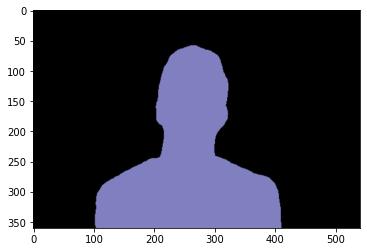

In [86]:
segvalues, segvalues_name, output = input_img_2_segmentation(img_path_m)

print(segvalues)
print(segvalues_name)
plt.imshow(output)

(360, 541)


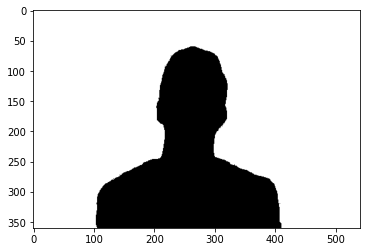

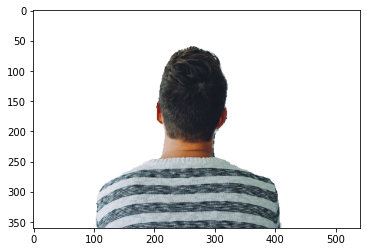

In [88]:
# 합성할 사람 처리
seg_map_m = get_seg_map(15) # 사람 15
img_mask = seg_map_m.astype(np.uint8) * 255
print(seg_map_m.shape)

# 세그멘테이션 마스크를 이용해 배경만 추출한다
img_mask_gray = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_mask_inv = cv2.bitwise_not(img_mask_gray) # bitwise_not: 이미지 반전
plt.imshow(cv2.cvtColor(img_mask_inv, cv2.COLOR_BGR2RGB))
plt.show()

img_m = cv2.bitwise_or(img_orig_m, img_mask_inv) # 합치기
plt.imshow(cv2.cvtColor(img_m, cv2.COLOR_BGR2RGB))
plt.show()

360 541


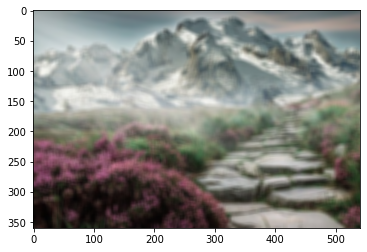

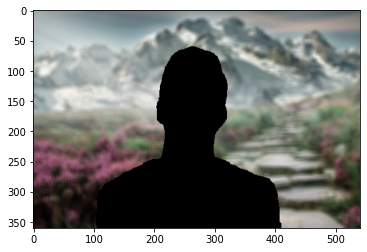

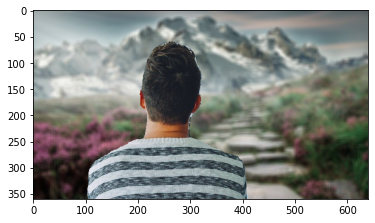

In [101]:
# 합성 위치: 사이즈가 비슷하기 때문에 인물 사이즈 가져옴
height = img_orig_m.shape[0]
width = img_orig_m.shape[1]
print(height, width)

#  배경 흐리게
img_blur_bg = cv2.blur(img_orig_bg, (8,8))

# 합성할 이미지
img_cut_bg = img_blur_bg[:height, :width]
plt.imshow(cv2.cvtColor(img_cut_bg, cv2.COLOR_BGR2RGB))
plt.show()

# 사람 모양으로 자름
img_bg_blur = cv2.bitwise_and(img_mask_inv, img_cut_bg)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 합성
img_concat = np.where(img_mask_gray==255, img_m, img_bg_blur)

#  흐리게 만든 배경과 합치기
img_blur_bg[:height, :width] = img_concat

plt.imshow(cv2.cvtColor(img_blur_bg, cv2.COLOR_BGR2RGB))
plt.show()

맨 처음 남녀사진(얼굴)을 보면 인물이 작아지거나 뚜렷하지 않으면 경계가 흐려질 수 있을것 같다는 생각을 했다. 
그리고 무엇을 인식해야할 것인지 좀 명확하지 않다랄까
그리고 여성의 목도리 중간이 비어있고, 컵도 남성과 다르게 포함되지 않는다.
원가 수치로 조절한다던가 하는게 있는지 궁금하다.